<a href="https://colab.research.google.com/github/codn0185/Artificial-Intelligence/blob/main/%5BAI2025%20Assignment%5D%20CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Classification

## Import Packages

In [1]:
import sys
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Preparation
Use CIFAR10 handwriting dataset

In [2]:
cifar10 = tf.keras.datasets.cifar10

Prepare data for training

In [3]:
# train / test split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# minmax normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# Compile and Train neural network

## CNN Modeling
Create a convolutional neural network

### Goal

Improve the provided basic CNN model and achieve CIFAR-10 **test accuracy ≥ 75%**.


Modify the network architecture!

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        32, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(
        32, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(
        64, (3, 3), activation="relu", padding="same", input_shape=(16, 16, 32)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(
        64, (3, 3), activation="relu", padding="same", input_shape=(16, 16, 32)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(
        128, (3, 3), activation="relu", padding="same", input_shape=(4, 4, 128)),
    tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(
        128, (3, 3), activation="relu", padding="same", input_shape=(4, 4, 128)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax"),
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.3303 - loss: 2.0823 - val_accuracy: 0.5233 - val_loss: 1.2952
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5778 - loss: 1.1865 - val_accuracy: 0.5216 - val_loss: 1.5564
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6659 - loss: 0.9588 - val_accuracy: 0.7272 - val_loss: 0.7756
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7111 - loss: 0.8313 - val_accuracy: 0.7500 - val_loss: 0.7223
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7414 - loss: 0.7559 - val_accuracy: 0.7594 - val_loss: 0.7069
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7608 - loss: 0.7015 - val_accuracy: 0.7716 - val_loss: 0.6619
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7822 - loss: 0.6417 - val_accuracy: 0.7875 - val_loss: 0.6099
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8002 - loss: 

## Evaluate neural network performance


In [12]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.8600 - loss: 0.4735


[0.4735146462917328, 0.8600000143051147]

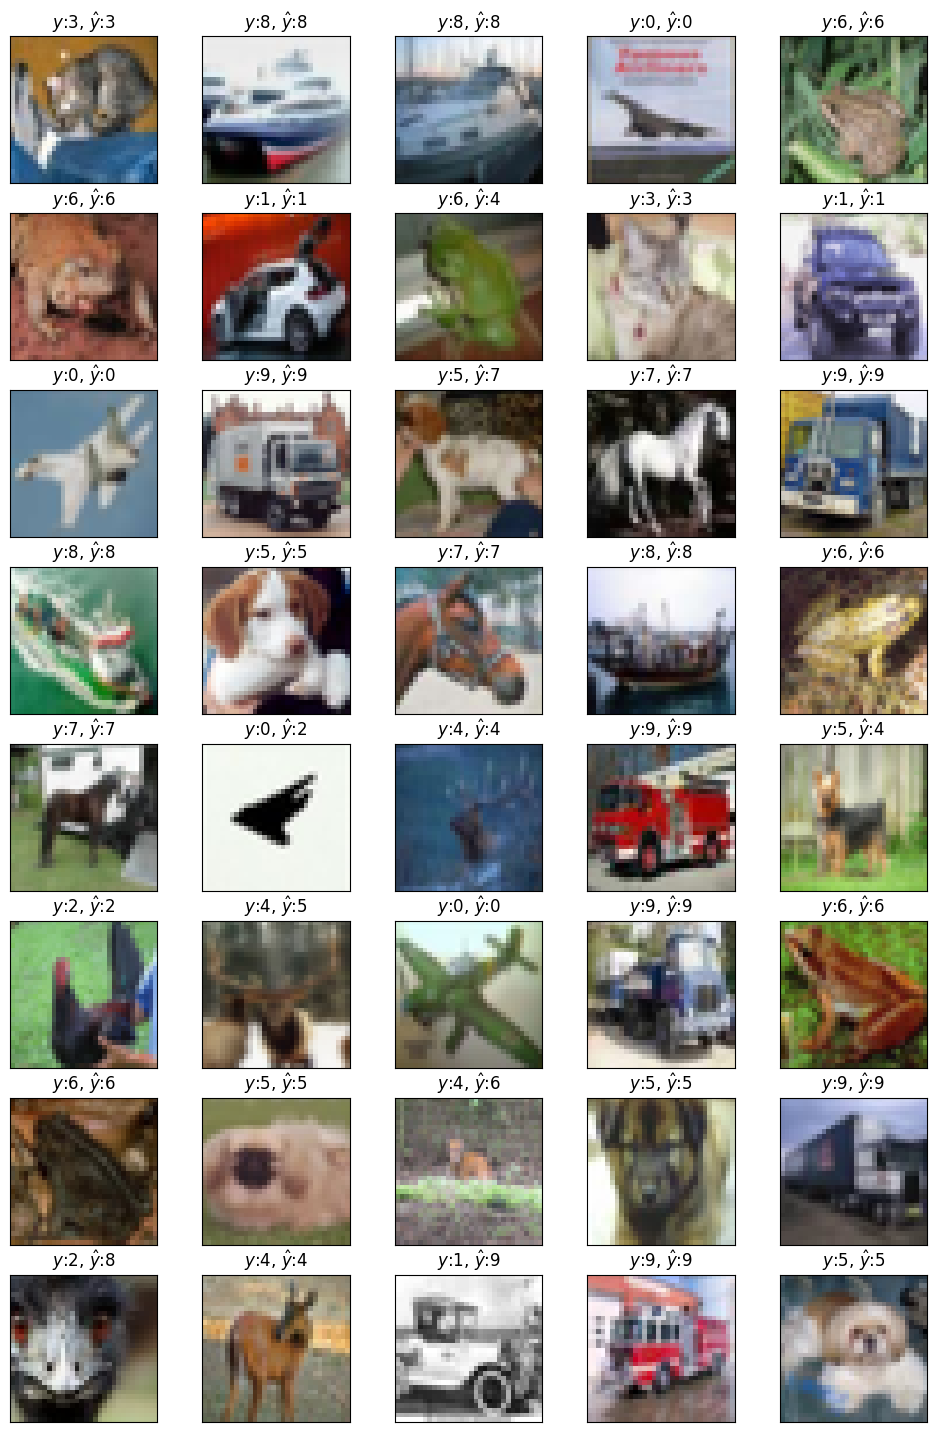

In [13]:
prob = model.predict(x_test[0:40, :], verbose=0)
pred = tf.argmax(prob, axis=1)

fig = plt.figure(figsize=(12, 18))
for i in range(40):
  subplot = fig.add_subplot(8, 5, i + 1)

  subplot.set_xticks([])
  subplot.set_yticks([])

  string = r'$\hat{y}$'
  subplot.set_title(f'$y$:{tf.argmax(y_test[i])}, {string}:{pred[i].numpy()}')

  subplot.imshow(tf.squeeze(x_test[i]), cmap=plt.cm.gray_r)
plt.show()
